In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

PROJECT_ROOT = Path("/content/drive/MyDrive/SkinCare_AI_Component")
CM_CSV = PROJECT_ROOT / "results/skin_type/convnext_cleaned_confusion_matrix.csv"

cm_df = pd.read_csv(CM_CSV, index_col=0)
cm = cm_df.values

print("✅ Loaded:", CM_CSV)
display(cm_df)


✅ Loaded: /content/drive/MyDrive/SkinCare_AI_Component/results/skin_type/convnext_cleaned_confusion_matrix.csv


,pred_oily,pred_dry,pred_combination
true_oily,257,81,31
true_dry,56,363,27
true_combination,43,43,150


✅ Saved: /content/drive/MyDrive/SkinCare_AI_Component/results/skin_type/convnext_cleaned_confusion_matrix_counts.png


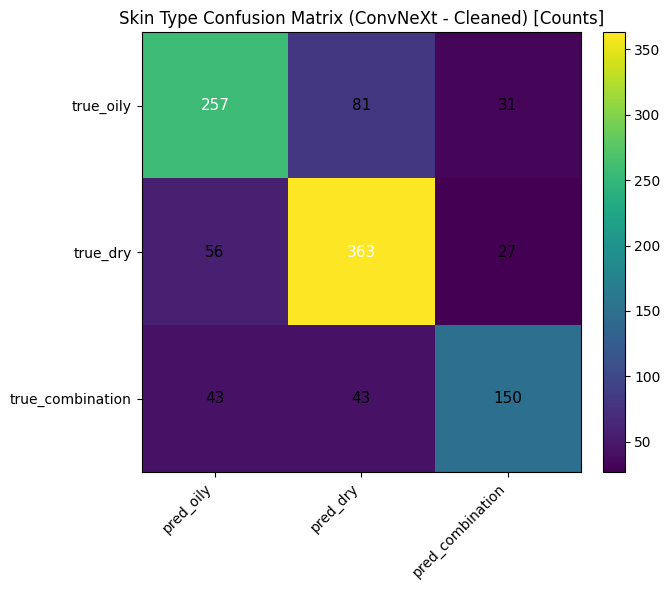

In [ ]:
def plot_cm_with_numbers(cm_df, title, save_path):
    cm = cm_df.values
    rows, cols = cm.shape

    plt.figure(figsize=(7, 6))
    im = plt.imshow(cm)

    plt.title(title)
    plt.xticks(range(cols), cm_df.columns, rotation=45, ha="right")
    plt.yticks(range(rows), cm_df.index)

    # colorbar
    plt.colorbar(im, fraction=0.046, pad=0.04)

    # write numbers in each cell
    max_val = cm.max() if cm.max() != 0 else 1
    for i in range(rows):
        for j in range(cols):
            val = cm[i, j]
            # choose text color based on background intensity
            color = "white" if val > (0.5 * max_val) else "black"
            plt.text(j, i, str(int(val)), ha="center", va="center", color=color, fontsize=11)

    plt.tight_layout()
    plt.savefig(save_path, dpi=250)
    print("✅ Saved:", save_path)
    plt.show()

out_png_counts = PROJECT_ROOT / "results/skin_type/convnext_cleaned_confusion_matrix_counts.png"
plot_cm_with_numbers(
    cm_df,
    "Skin Type Confusion Matrix (ConvNeXt - Cleaned) [Counts]",
    out_png_counts
)


✅ Saved: /content/drive/MyDrive/SkinCare_AI_Component/results/skin_type/convnext_cleaned_confusion_matrix_normalized.png


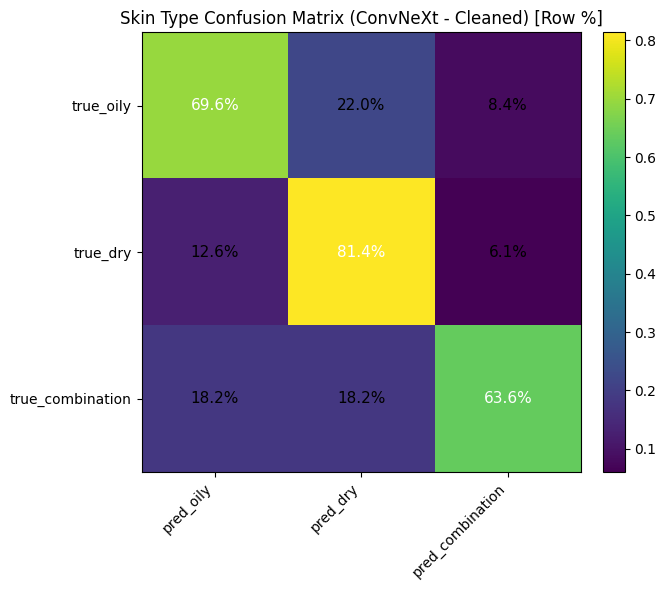

In [ ]:
# row-wise normalization (each true class sums to 1)
cm_norm = cm_df.div(cm_df.sum(axis=1).replace(0, np.nan), axis=0).fillna(0)

def plot_cm_percent(cm_df_norm, title, save_path):
    cm = cm_df_norm.values
    rows, cols = cm.shape

    plt.figure(figsize=(7, 6))
    im = plt.imshow(cm)

    plt.title(title)
    plt.xticks(range(cols), cm_df_norm.columns, rotation=45, ha="right")
    plt.yticks(range(rows), cm_df_norm.index)

    plt.colorbar(im, fraction=0.046, pad=0.04)

    for i in range(rows):
        for j in range(cols):
            val = cm[i, j] * 100.0
            text = f"{val:.1f}%"
            color = "white" if cm[i, j] > 0.5 else "black"
            plt.text(j, i, text, ha="center", va="center", color=color, fontsize=11)

    plt.tight_layout()
    plt.savefig(save_path, dpi=250)
    print("✅ Saved:", save_path)
    plt.show()

out_png_norm = PROJECT_ROOT / "results/skin_type/convnext_cleaned_confusion_matrix_normalized.png"
plot_cm_percent(
    cm_norm,
    "Skin Type Confusion Matrix (ConvNeXt - Cleaned) [Row %]",
    out_png_norm
)
